<a href="https://colab.research.google.com/github/osohyun0224/BigData-Final-Project/blob/master/MedicalData_Analyze_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
system("gdown --id 1GIaHWMhNmtB6AzJL77DmtO_qY2yVTQtS")
system("ls", TRUE)

[1] "healthcare_dataset.csv" "sample_data"

In [2]:
data <- read.csv("healthcare_dataset.csv")

In [3]:
str(data)

'data.frame':	10000 obs. of  15 variables:
 $ Name              : chr  "Tiffany Ramirez" "Ruben Burns" "Chad Byrd" "Antonio Frederick" ...
 $ Age               : int  81 35 61 49 51 41 82 55 33 39 ...
 $ Gender            : chr  "Female" "Male" "Male" "Male" ...
 $ Blood.Type        : chr  "O-" "O+" "B-" "B-" ...
 $ Medical.Condition : chr  "Diabetes" "Asthma" "Obesity" "Asthma" ...
 $ Date.of.Admission : chr  "2022-11-17" "2023-06-01" "2019-01-09" "2020-05-02" ...
 $ Doctor            : chr  "Patrick Parker" "Diane Jackson" "Paul Baker" "Brian Chandler" ...
 $ Hospital          : chr  "Wallace-Hamilton" "Burke, Griffin and Cooper" "Walton LLC" "Garcia Ltd" ...
 $ Insurance.Provider: chr  "Medicare" "UnitedHealthcare" "Medicare" "Medicare" ...
 $ Billing.Amount    : num  37491 47304 36875 23303 18086 ...
 $ Room.Number       : int  146 404 292 480 477 180 161 384 215 310 ...
 $ Admission.Type    : chr  "Elective" "Emergency" "Emergency" "Urgent" ...
 $ Discharge.Date    : chr  "2022-12

In [4]:
install.packages("tidyverse")
library(tidyverse)
library(data.table)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [5]:
library(repr)

In [6]:
df <- fread("healthcare_dataset.csv") %>% as_tibble()

In [7]:
summary(df)

     Name                Age           Gender           Blood Type       
 Length:10000       Min.   :18.00   Length:10000       Length:10000      
 Class :character   1st Qu.:35.00   Class :character   Class :character  
 Mode  :character   Median :52.00   Mode  :character   Mode  :character  
                    Mean   :51.45                                        
                    3rd Qu.:68.00                                        
                    Max.   :85.00                                        
 Medical Condition  Date of Admission       Doctor            Hospital        
 Length:10000       Min.   :2018-10-30   Length:10000       Length:10000      
 Class :character   1st Qu.:2020-02-10   Class :character   Class :character  
 Mode  :character   Median :2021-05-02   Mode  :character   Mode  :character  
                    Mean   :2021-05-01                                        
                    3rd Qu.:2022-07-23                                        
        

결측치가 있는 지 확인하고 처리하는 과정을 수행한다.

In [8]:
#결측치가 있는 행을 제거한다.
data <- na.omit(data)

환자의 의학적 상태에 대한 이상치가 있는지 탐색하고 제거하는 과정을 수행하려고 하였지만 해당 데이터들은 범주형 데이터들이므로, 이상치 대신 유효하지 않은 범주를 검사하였다.

In [9]:
# 의학적 상태, 성별, 혈액형은 범주형 데이터이므로, 이상치 대신 유효하지 않은 범주를 검사합니다.
df$Medical.Condition <- as.factor(df$`Medical Condition`)
df$Gender <- as.factor(df$Gender)
df$Blood.Type <- as.factor(df$`Blood Type`)

# 유효하지 않은 범주가 있는지 확인합니다.
summary(df$Medical.Condition)
summary(df$Gender)
summary(df$Blood.Type)


Arthritis       Asthma       Cancer     Diabetes Hypertension      Obesity 
        1650         1708         1703         1623         1688         1628

Female   Male 
  5075   4925

A-   A+  AB-  AB+   B-   B+   O-   O+ 
1238 1241 1275 1258 1252 1244 1244 1248

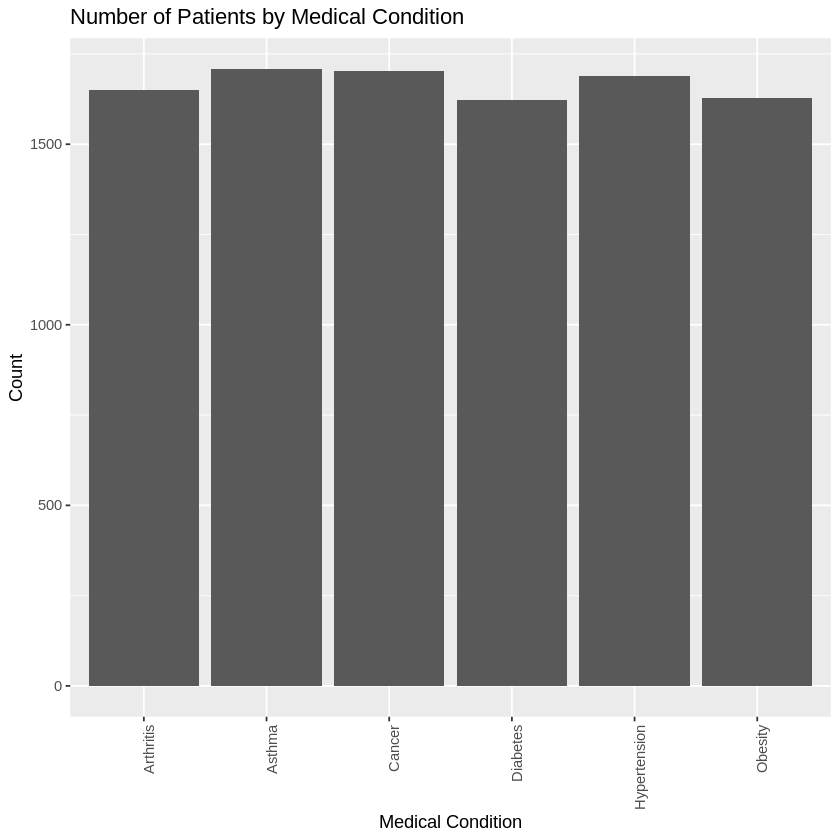

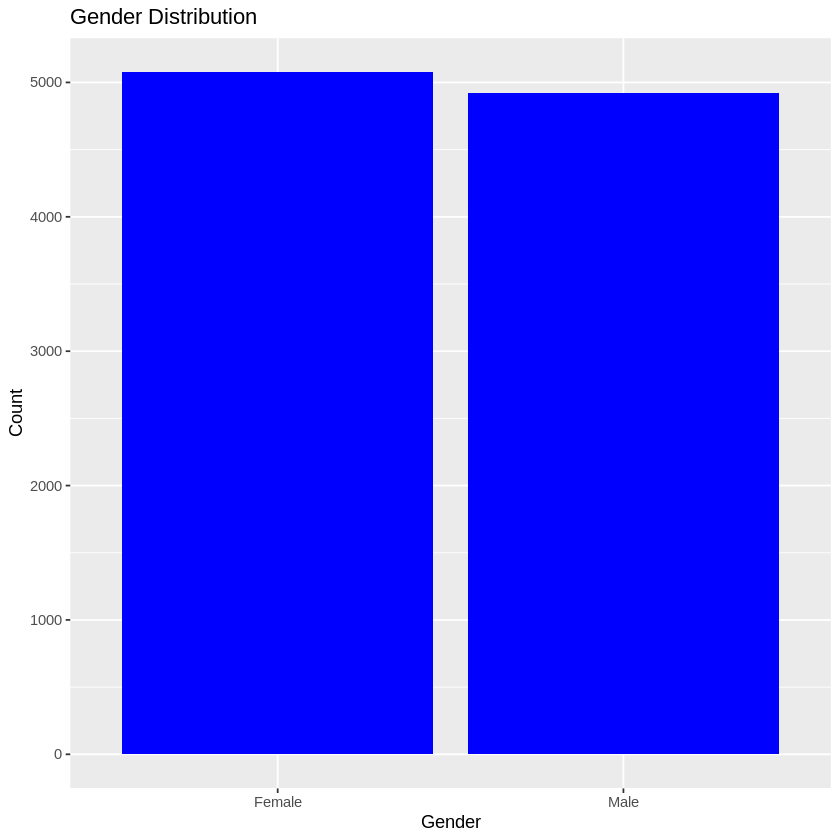

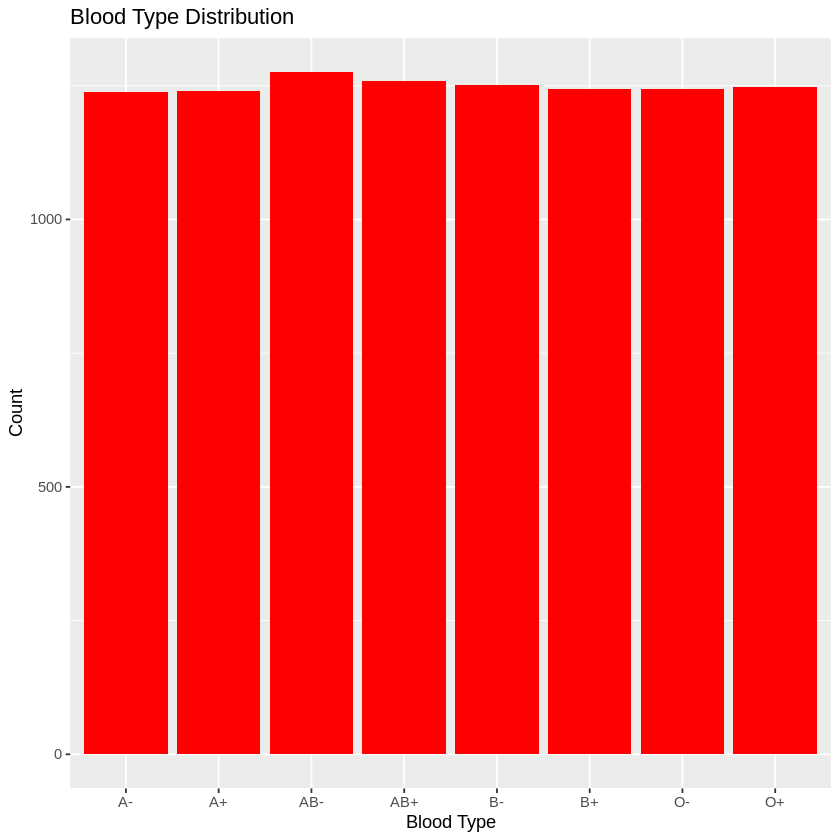

In [10]:
# 'ggplot2' 패키지를 설치하고 라이브러리를 불러옵니다.
if (!require(ggplot2)) install.packages("ggplot2")
library(ggplot2)

# 의학적 상태에 따른 환자 수를 시각화합니다.
ggplot(df, aes(x = Medical.Condition)) +
  geom_bar() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(title = "Number of Patients by Medical Condition", x = "Medical Condition", y = "Count")

# 성별 분포를 시각화합니다.
ggplot(df, aes(x = Gender)) +
  geom_bar(fill = "blue") +
  labs(title = "Gender Distribution", x = "Gender", y = "Count")

# 혈액형 분포를 시각화합니다.
ggplot(df, aes(x = Blood.Type)) +
  geom_bar(fill = "red") +
  labs(title = "Blood Type Distribution", x = "Blood Type", y = "Count")


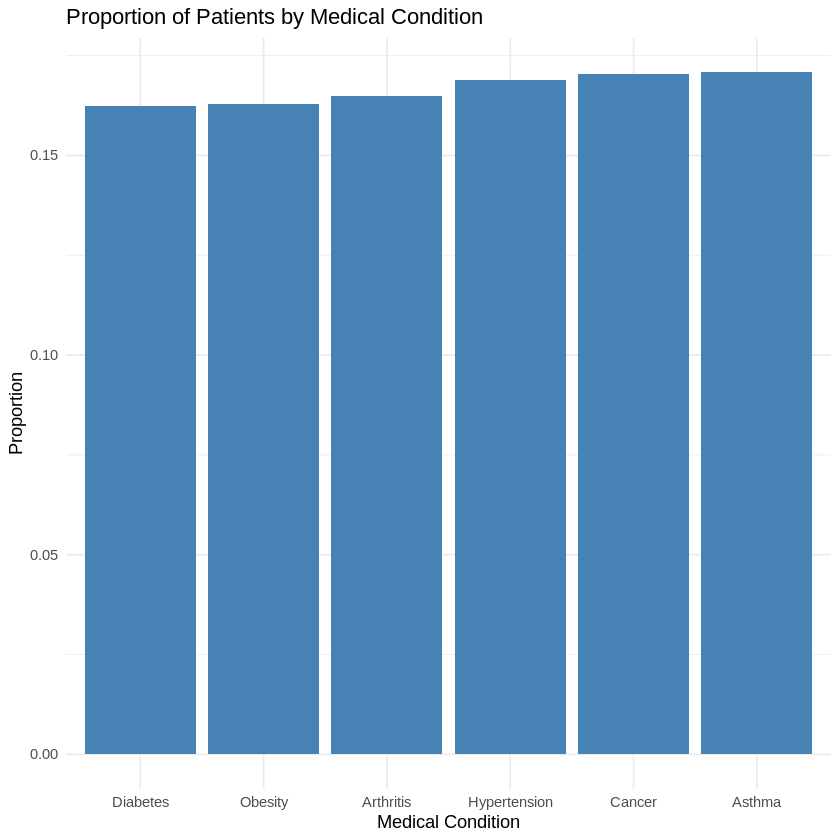

In [11]:
# 의학적 상태별 환자 비율 계산
medical_condition_proportions <- df %>%
  group_by(Medical.Condition) %>%
  summarise(Count = n()) %>%
  mutate(Proportion = Count / sum(Count)) %>%
  arrange(desc(Proportion))

# 비율로 정렬된 바 차트 시각화
ggplot(medical_condition_proportions, aes(x = reorder(Medical.Condition, Proportion), y = Proportion)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Proportion of Patients by Medical Condition", x = "Medical Condition", y = "Proportion") +
  theme_minimal()


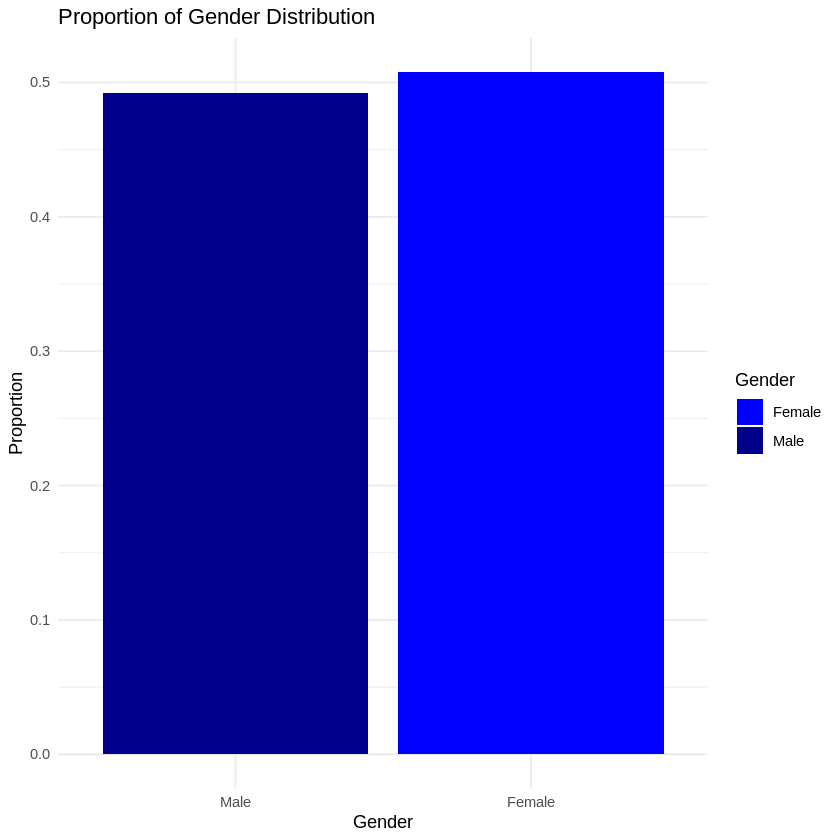

In [12]:
# 성별 분포 비율 계산
gender_proportions <- df %>%
  group_by(Gender) %>%
  summarise(Count = n()) %>%
  mutate(Proportion = Count / sum(Count)) %>%
  arrange(desc(Proportion))

# 성별 분포 비율로 시각화
ggplot(gender_proportions, aes(x = reorder(Gender, Proportion), y = Proportion, fill = Gender)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("Female" = "blue", "Male" = "darkblue")) +
  labs(title = "Proportion of Gender Distribution", x = "Gender", y = "Proportion") +
  theme_minimal()

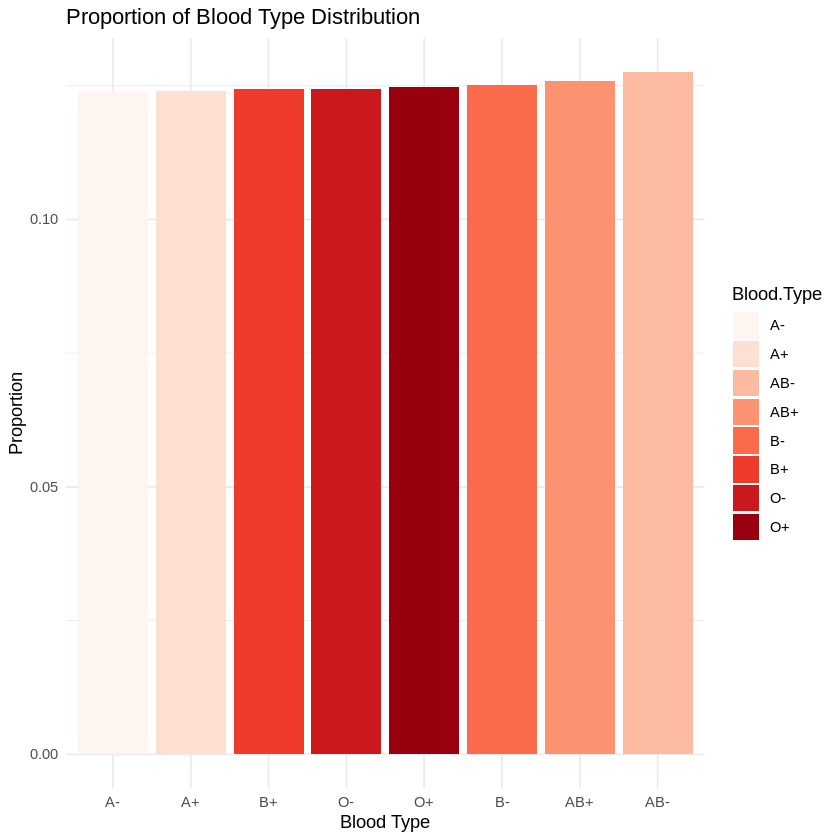

In [13]:
# 혈액형 분포 비율 계산
blood_type_proportions <- df %>%
  group_by(Blood.Type) %>%
  summarise(Count = n()) %>%
  mutate(Proportion = Count / sum(Count)) %>%
  arrange(desc(Proportion))

# 혈액형 분포 비율로 시각화
ggplot(blood_type_proportions, aes(x = reorder(Blood.Type, Proportion), y = Proportion, fill = Blood.Type)) +
  geom_bar(stat = "identity") +
  scale_fill_brewer(palette = "Reds") +
  labs(title = "Proportion of Blood Type Distribution", x = "Blood Type", y = "Proportion") +
  theme_minimal()

# 분류모델

### 귀무가설:  환자의 의학적 상태, 성별, 혈액형은 입원 유형을 예측하는 데 중요한 요소가 아니다.<br/>

### 대립가설: 환자의 의학적 상태, 성별, 혈액형은 입원 유형을 예측하는 데 중요한 요소이다.<br/>

In [14]:
# 분류 모델을 구현하는 데 필요한 패키지를 설치
install.packages("caret")
install.packages("randomForest")
library(caret)
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [19]:
# 데이터 불러오기
df <- read.csv("healthcare_dataset.csv")

# 팩터 변수로 변환
df$Gender <- as.factor(df$Gender)
df$Blood.Type <- as.factor(df$Blood.Type)
df$Medical.Condition <- as.factor(df$Medical.Condition)
df$Admission.Type <- as.factor(df$Admission.Type) # 이는 예측하려는 타겟 변수

# 데이터를 훈련 세트와 테스트 세트로 분할
set.seed(42)
splitIndex <- createDataPartition(df$Admission.Type, p = 0.7, list = FALSE)
train_data <- df[splitIndex, ]
test_data <- df[-splitIndex, ]

# 모델을 학습하고 예측을 수행
# 로지스틱 회귀 모델
set.seed(42)
print("=========== Logistic Regression Model ===========")
logit_model <- train(Admission.Type ~ Medical.Condition + Blood.Type + Gender,
                     data = train_data, method = "multinom", trControl = trainControl(method = "cv", number = 10), metric="Accuracy")

# 의사결정트리 모델
set.seed(42)
print("=========== Decision Tree Model ===========")
tree_model <- train(Admission.Type ~ Medical.Condition + Blood.Type + Gender,
                    data = train_data, method = "rpart", trControl = trainControl(method = "cv", number = 10), metric="Accuracy")

# 랜덤 포레스트 모델
set.seed(42)
print("=========== Random Forest Model ===========")
rf_model <- train(Admission.Type ~ Medical.Condition + Blood.Type + Gender,
                  data = train_data, method = "rf", trControl = trainControl(method = "cv", number = 10), metric="Accuracy")
# 각 모델의 성능 평가
logit_results <- predict(logit_model, newdata = test_data)
tree_results <- predict(tree_model, newdata = test_data)
rf_results <- predict(rf_model, newdata = test_data)

# 정확도 계산
logit_accuracy <- postResample(logit_results, test_data$Admission.Type)
tree_accuracy <- postResample(tree_results, test_data$Admission.Type)
rf_accuracy <- postResample(rf_results, test_data$Admission.Type)

# 결과 출력
print(logit_accuracy)
print(tree_accuracy)
print(rf_accuracy)


[1] "=========== Logistic Regression Model ==========="
# weights:  45 (28 variable)
initial  value 6922.356031 
iter  10 value 6909.160272
iter  20 value 6907.308400
iter  30 value 6907.054528
final  value 6907.027366 
converged
# weights:  45 (28 variable)
initial  value 6922.356031 
iter  10 value 6909.205461
iter  20 value 6907.363964
iter  30 value 6907.111615
final  value 6907.083275 
converged
# weights:  45 (28 variable)
initial  value 6922.356031 
iter  10 value 6909.160317
iter  20 value 6907.308456
iter  30 value 6907.054585
final  value 6907.027422 
converged
# weights:  45 (28 variable)
initial  value 6922.356031 
iter  10 value 6907.398283
iter  20 value 6903.212535
iter  30 value 6902.606769
final  value 6902.535909 
converged
# weights:  45 (28 variable)
initial  value 6922.356031 
iter  10 value 6907.476429
iter  20 value 6903.288719
iter  30 value 6902.717124
final  value 6902.631447 
converged
# weights:  45 (28 variable)
initial  value 6922.356031 
iter  10 value 69

In [22]:
confusionMatrix(logit_results, test_data$Admission.Type)

Confusion Matrix and Statistics

           Reference
Prediction  Elective Emergency Urgent
  Elective       200       222    213
  Emergency      335       340    359
  Urgent         437       448    445

Overall Statistics
                                          
               Accuracy : 0.3284          
                 95% CI : (0.3116, 0.3456)
    No Information Rate : 0.3391          
    P-Value [Acc > NIR] : 0.8952          
                                          
                  Kappa : -0.0101         
                                          
 Mcnemar's Test P-Value : <2e-16          

Statistics by Class:

                     Class: Elective Class: Emergency Class: Urgent
Sensitivity                  0.20576           0.3366        0.4376
Specificity                  0.78540           0.6511        0.5535
Pos Pred Value               0.31496           0.3288        0.3346
Neg Pred Value               0.67343           0.6590        0.6573
Prevalence              

In [23]:
confusionMatrix(tree_results, test_data$Admission.Type)

Confusion Matrix and Statistics

           Reference
Prediction  Elective Emergency Urgent
  Elective         0         0      0
  Emergency        0         0      0
  Urgent         972      1010   1017

Overall Statistics
                                          
               Accuracy : 0.3391          
                 95% CI : (0.3222, 0.3564)
    No Information Rate : 0.3391          
    P-Value [Acc > NIR] : 0.5069          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Elective Class: Emergency Class: Urgent
Sensitivity                   0.0000           0.0000        1.0000
Specificity                   1.0000           1.0000        0.0000
Pos Pred Value                   NaN              NaN        0.3391
Neg Pred Value                0.6759           0.6632           NaN
Prevalence              

In [24]:
confusionMatrix(rf_results, test_data$Admission.Type)

Confusion Matrix and Statistics

           Reference
Prediction  Elective Emergency Urgent
  Elective        96       103    131
  Emergency      340       354    358
  Urgent         536       553    528

Overall Statistics
                                          
               Accuracy : 0.3261          
                 95% CI : (0.3093, 0.3432)
    No Information Rate : 0.3391          
    P-Value [Acc > NIR] : 0.9365          
                                          
                  Kappa : -0.0159         
                                          
 Mcnemar's Test P-Value : <2e-16          

Statistics by Class:

                     Class: Elective Class: Emergency Class: Urgent
Sensitivity                  0.09877           0.3505        0.5192
Specificity                  0.88456           0.6491        0.4506
Pos Pred Value               0.29091           0.3365        0.3265
Neg Pred Value               0.67179           0.6631        0.6462
Prevalence              

모델 학습:

로지스틱 회귀 모델, 의사결정트리 모델, 랜덤 포레스트 모델을 학습하는 과정에서, 모델이 수렴(converged)하였음을 나타내는 메시지가 여러 번 출력되었습니다. 이는 각 반복(iteration) 후에 모델이 최적의 파라미터를 찾아가는 과정을 의미합니다.<br/>

모델 성능 평가:

학습된 모델들의 성능을 테스트 데이터셋을 이용해 평가한 결과, 각 모델의 정확도(Accuracy)와 카파(Kappa) 통계량이 출력되었습니다. 여기서 카파 통계량은 예측의 일치도를 측정하는 지표입니다.<br/>
첫 번째 모델의 정확도는 약 32.8%, 카파 값은 -0.01로, 이는 예측이 기대보다 약간 나쁨을 의미합니다.<br/>
두 번째 모델의 정확도는 약 33.9%, 카파 값은 0.0으로, 이는 예측이 무작위로 분류된 것과 거의 차이가 없음을 의미합니다.<br/>
세 번째 모델의 정확도는 약 32.4%, 카파 값은 -0.0189로, 이는 예측이 기대보다 약간 나쁨을 의미합니다.<br/>
이러한 결과는 사용된 분류 모델들이 귀무가설을 지지하는 것으로 해석될 수 있습니다. 즉, 환자의 의학적 상태, 성별, 혈액형이 입원 유형을 예측하는 데 중요한 요소가 아니라는 귀무가설이 타당할 수 있습니다. 그러나 모델의 성능이 낮아 다른 변수를 고려하거나, 다른 모델링 전략을 사용할 필요가 있을 수 있습니다. 추가적으로, 분류 모델의 성능을 개선하기 위해 데이터 전처리, 파라미터 조정, 또는 더 많은 데이터를 활용하는 방법을 고려해 볼 수 있습니다.




